In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [25]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [ ]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [ ]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [ ]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [ ]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [ ]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [ ]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [ ]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [ ]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:15,  7.64it/s]                         


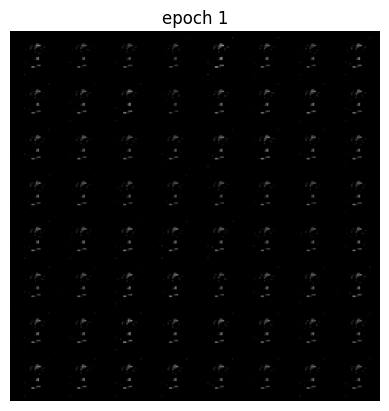

Epoch 1 of 100
Generator loss: 1.27952170, Discriminator loss: 0.96459019


118it [00:14,  7.93it/s]                         


Epoch 2 of 100
Generator loss: 1.85417616, Discriminator loss: 1.24893141


118it [00:15,  7.86it/s]                         


Epoch 3 of 100
Generator loss: 2.70969534, Discriminator loss: 1.10405576


118it [00:15,  7.84it/s]                         


Epoch 4 of 100
Generator loss: 2.53535271, Discriminator loss: 1.02283752


118it [00:15,  7.78it/s]                         


Epoch 5 of 100
Generator loss: 1.53415859, Discriminator loss: 1.16710591


118it [00:14,  7.92it/s]                         


Epoch 6 of 100
Generator loss: 0.89923555, Discriminator loss: 1.25878239


118it [00:14,  7.93it/s]                         


Epoch 7 of 100
Generator loss: 1.03916848, Discriminator loss: 1.07066894


118it [00:15,  7.61it/s]                         


Epoch 8 of 100
Generator loss: 1.42371881, Discriminator loss: 1.06033909


118it [00:15,  7.67it/s]                         


Epoch 9 of 100
Generator loss: 1.48371148, Discriminator loss: 1.20105052


118it [00:15,  7.82it/s]                         


Epoch 10 of 100
Generator loss: 1.62625670, Discriminator loss: 1.29369414


118it [00:14,  7.93it/s]                         


Epoch 11 of 100
Generator loss: 1.92119014, Discriminator loss: 0.82753074


118it [00:14,  7.97it/s]                         


Epoch 12 of 100
Generator loss: 1.79597664, Discriminator loss: 1.32574260


118it [00:14,  8.05it/s]                         


Epoch 13 of 100
Generator loss: 2.18475890, Discriminator loss: 1.10004425


118it [00:14,  7.92it/s]                         


Epoch 14 of 100
Generator loss: 1.70578277, Discriminator loss: 0.91117138


118it [00:14,  8.01it/s]                         


Epoch 15 of 100
Generator loss: 2.06217313, Discriminator loss: 0.91168571


118it [00:14,  7.99it/s]                         


Epoch 16 of 100
Generator loss: 1.91668200, Discriminator loss: 0.80591893


118it [00:14,  8.10it/s]                         


Epoch 17 of 100
Generator loss: 2.05613804, Discriminator loss: 0.78028595


118it [00:14,  8.03it/s]                         


Epoch 18 of 100
Generator loss: 2.31562114, Discriminator loss: 0.70747834


118it [00:14,  8.00it/s]                         


Epoch 19 of 100
Generator loss: 2.76052237, Discriminator loss: 0.69368482


118it [00:15,  7.81it/s]                         


Epoch 20 of 100
Generator loss: 2.48195529, Discriminator loss: 0.65067357


118it [00:14,  7.89it/s]                         


Epoch 21 of 100
Generator loss: 2.93095303, Discriminator loss: 0.54145944


118it [00:14,  7.92it/s]                         


Epoch 22 of 100
Generator loss: 2.51685429, Discriminator loss: 0.84765851


118it [00:14,  8.09it/s]                         


Epoch 23 of 100
Generator loss: 2.03827572, Discriminator loss: 0.89458007


118it [00:14,  8.11it/s]                         


Epoch 24 of 100
Generator loss: 2.47406363, Discriminator loss: 0.78536165


118it [00:14,  7.95it/s]                         


Epoch 25 of 100
Generator loss: 2.92538500, Discriminator loss: 0.59844744


118it [00:14,  8.00it/s]                         


Epoch 26 of 100
Generator loss: 2.50200748, Discriminator loss: 0.68795526


118it [00:14,  8.11it/s]                         


Epoch 27 of 100
Generator loss: 2.98031425, Discriminator loss: 0.50832355


118it [00:14,  8.10it/s]                         


Epoch 28 of 100
Generator loss: 2.97045827, Discriminator loss: 0.44971704


118it [00:14,  8.07it/s]                         


Epoch 29 of 100
Generator loss: 3.32366586, Discriminator loss: 0.58302498


118it [00:14,  8.11it/s]                         


Epoch 30 of 100
Generator loss: 2.38825536, Discriminator loss: 0.80132169


118it [00:14,  8.08it/s]                         


Epoch 31 of 100
Generator loss: 2.29627681, Discriminator loss: 0.66027784


118it [00:14,  7.88it/s]                         


Epoch 32 of 100
Generator loss: 3.07128215, Discriminator loss: 0.45789322


118it [00:14,  7.91it/s]                         


Epoch 33 of 100
Generator loss: 2.58026004, Discriminator loss: 0.58876580


118it [00:14,  7.99it/s]                         


Epoch 34 of 100
Generator loss: 2.67710924, Discriminator loss: 0.66397727


118it [00:14,  7.90it/s]                         


Epoch 35 of 100
Generator loss: 2.79869390, Discriminator loss: 0.62628621


118it [00:15,  7.79it/s]                         


Epoch 36 of 100
Generator loss: 2.48730254, Discriminator loss: 0.61705023


118it [00:14,  7.88it/s]                         


Epoch 37 of 100
Generator loss: 2.74250722, Discriminator loss: 0.58968604


118it [00:14,  8.08it/s]                         


Epoch 38 of 100
Generator loss: 2.82284904, Discriminator loss: 0.55770999


118it [00:14,  7.97it/s]                         


Epoch 39 of 100
Generator loss: 3.27649426, Discriminator loss: 0.43708989


118it [00:14,  8.02it/s]                         


Epoch 40 of 100
Generator loss: 3.21873784, Discriminator loss: 0.49185365


118it [00:14,  8.01it/s]                         


Epoch 41 of 100
Generator loss: 2.91333747, Discriminator loss: 0.52884710


118it [00:14,  8.08it/s]                         


Epoch 42 of 100
Generator loss: 3.19073343, Discriminator loss: 0.46337035


118it [00:14,  7.99it/s]                         


Epoch 43 of 100
Generator loss: 3.52437949, Discriminator loss: 0.38473824


118it [00:14,  8.05it/s]                         


Epoch 44 of 100
Generator loss: 3.31354713, Discriminator loss: 0.48136011


118it [00:14,  7.92it/s]                         


Epoch 45 of 100
Generator loss: 2.91922379, Discriminator loss: 0.51921940


118it [00:15,  7.83it/s]                         


Epoch 46 of 100
Generator loss: 3.10787868, Discriminator loss: 0.48288012


118it [00:15,  7.73it/s]                         


Epoch 47 of 100
Generator loss: 3.27353573, Discriminator loss: 0.42414063


118it [00:15,  7.80it/s]                         


Epoch 48 of 100
Generator loss: 3.11255455, Discriminator loss: 0.44955352


118it [00:14,  7.98it/s]                         


Epoch 49 of 100
Generator loss: 2.88038039, Discriminator loss: 0.48787129


118it [00:14,  8.00it/s]                         


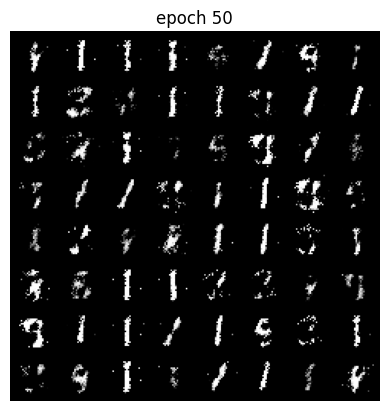

Epoch 50 of 100
Generator loss: 3.34370375, Discriminator loss: 0.39030343


118it [00:14,  7.96it/s]                         


Epoch 51 of 100
Generator loss: 3.29276419, Discriminator loss: 0.47704613


118it [00:14,  7.92it/s]                         


Epoch 52 of 100
Generator loss: 3.39123893, Discriminator loss: 0.45952776


118it [00:15,  7.86it/s]                         


Epoch 53 of 100
Generator loss: 3.36685300, Discriminator loss: 0.44595745


118it [00:15,  7.80it/s]                         


Epoch 54 of 100
Generator loss: 3.17183375, Discriminator loss: 0.46720493


118it [00:14,  7.97it/s]                         


Epoch 55 of 100
Generator loss: 3.24381709, Discriminator loss: 0.43824944


118it [00:14,  7.92it/s]                         


Epoch 56 of 100
Generator loss: 3.31280398, Discriminator loss: 0.44734997


118it [00:14,  7.90it/s]                         


Epoch 57 of 100
Generator loss: 3.20130587, Discriminator loss: 0.43926933


118it [00:15,  7.70it/s]                         


Epoch 58 of 100
Generator loss: 3.06972575, Discriminator loss: 0.47897249


118it [00:15,  7.85it/s]                         


Epoch 59 of 100
Generator loss: 2.84705281, Discriminator loss: 0.52785194


118it [00:15,  7.72it/s]                         


Epoch 60 of 100
Generator loss: 2.81700897, Discriminator loss: 0.53128463


118it [00:14,  7.94it/s]                         


Epoch 61 of 100
Generator loss: 3.00343966, Discriminator loss: 0.47528222


118it [00:14,  7.90it/s]                         


Epoch 62 of 100
Generator loss: 2.83195305, Discriminator loss: 0.49588981


118it [00:14,  7.93it/s]                         


Epoch 63 of 100
Generator loss: 2.95623016, Discriminator loss: 0.46348956


118it [00:14,  8.02it/s]                         


Epoch 64 of 100
Generator loss: 2.94013977, Discriminator loss: 0.50236088


118it [00:14,  7.94it/s]                         


Epoch 65 of 100
Generator loss: 2.71237588, Discriminator loss: 0.53776991


118it [00:14,  8.07it/s]                         


Epoch 66 of 100
Generator loss: 2.73384881, Discriminator loss: 0.51183665


118it [00:15,  7.84it/s]                         


Epoch 67 of 100
Generator loss: 2.67089534, Discriminator loss: 0.51251012


118it [00:14,  7.89it/s]                         


Epoch 68 of 100
Generator loss: 2.70609832, Discriminator loss: 0.50492662


118it [00:15,  7.78it/s]                         


Epoch 69 of 100
Generator loss: 2.74527717, Discriminator loss: 0.52789944


118it [00:15,  7.59it/s]                         


Epoch 70 of 100
Generator loss: 2.73421431, Discriminator loss: 0.55603248


118it [00:15,  7.58it/s]                         


Epoch 71 of 100
Generator loss: 2.54102182, Discriminator loss: 0.57966810


118it [00:14,  7.98it/s]                         


Epoch 72 of 100
Generator loss: 2.68685484, Discriminator loss: 0.56118673


118it [00:15,  7.85it/s]                         


Epoch 73 of 100
Generator loss: 2.60184097, Discriminator loss: 0.57819325


118it [00:14,  7.94it/s]                         


Epoch 74 of 100
Generator loss: 2.38911271, Discriminator loss: 0.58694685


118it [00:14,  7.99it/s]                         


Epoch 75 of 100
Generator loss: 2.39396596, Discriminator loss: 0.60886866


118it [00:15,  7.85it/s]                         


Epoch 76 of 100
Generator loss: 2.37365127, Discriminator loss: 0.61568034


118it [00:14,  8.01it/s]                         


Epoch 77 of 100
Generator loss: 2.38626170, Discriminator loss: 0.62832344


118it [00:14,  8.06it/s]                         


Epoch 78 of 100
Generator loss: 2.42421317, Discriminator loss: 0.63336498


118it [00:14,  8.06it/s]                         


Epoch 79 of 100
Generator loss: 2.34468460, Discriminator loss: 0.64769036


118it [00:14,  8.00it/s]                         


Epoch 80 of 100
Generator loss: 2.27225757, Discriminator loss: 0.65383381


118it [00:14,  7.92it/s]                         


Epoch 81 of 100
Generator loss: 2.21121669, Discriminator loss: 0.67852396


118it [00:15,  7.63it/s]                         


Epoch 82 of 100
Generator loss: 2.24682736, Discriminator loss: 0.69363075


118it [00:14,  7.94it/s]                         


Epoch 83 of 100
Generator loss: 2.13274598, Discriminator loss: 0.72286630


118it [00:15,  7.85it/s]                         


Epoch 84 of 100
Generator loss: 2.26670313, Discriminator loss: 0.68990499


118it [00:15,  7.84it/s]                         


Epoch 85 of 100
Generator loss: 2.21829224, Discriminator loss: 0.67037302


118it [00:14,  7.99it/s]                         


Epoch 86 of 100
Generator loss: 2.28751779, Discriminator loss: 0.67561471


118it [00:15,  7.80it/s]                         


Epoch 87 of 100
Generator loss: 2.28418088, Discriminator loss: 0.68273783


118it [00:14,  7.93it/s]                         


Epoch 88 of 100
Generator loss: 2.13341784, Discriminator loss: 0.72833306


118it [00:14,  7.94it/s]                         


Epoch 89 of 100
Generator loss: 2.20131040, Discriminator loss: 0.67934805


118it [00:14,  7.91it/s]                         


Epoch 90 of 100
Generator loss: 2.25124192, Discriminator loss: 0.70255673


118it [00:14,  8.00it/s]                         


Epoch 91 of 100
Generator loss: 2.11507869, Discriminator loss: 0.69363552


118it [00:14,  7.99it/s]                         


Epoch 92 of 100
Generator loss: 2.18477035, Discriminator loss: 0.69968486


118it [00:15,  7.86it/s]                         


Epoch 93 of 100
Generator loss: 2.18988776, Discriminator loss: 0.70752430


118it [00:15,  7.74it/s]                         


Epoch 94 of 100
Generator loss: 2.12077332, Discriminator loss: 0.71612304


118it [00:15,  7.84it/s]                         


Epoch 95 of 100
Generator loss: 2.11112905, Discriminator loss: 0.74118817


118it [00:15,  7.75it/s]                         


Epoch 96 of 100
Generator loss: 2.08948994, Discriminator loss: 0.75179315


118it [00:14,  7.93it/s]                         


Epoch 97 of 100
Generator loss: 1.98151958, Discriminator loss: 0.76553154


118it [00:14,  7.87it/s]                         


Epoch 98 of 100
Generator loss: 2.05622220, Discriminator loss: 0.75311321


118it [00:14,  7.93it/s]                         


Epoch 99 of 100
Generator loss: 2.05953836, Discriminator loss: 0.75623220


118it [00:14,  7.89it/s]                         


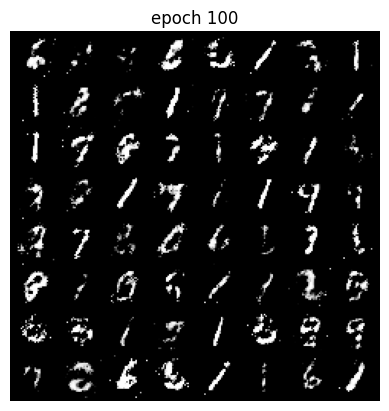

Epoch 100 of 100
Generator loss: 1.92531574, Discriminator loss: 0.79668385


In [ ]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        b_size = data[0].size(0) # batch size

        # Train discriminator
        discriminator.zero_grad()
        real_labels = label_real(b_size)
        fake_labels = label_fake(b_size)

        # Discriminator on real data
        real_outputs = discriminator(data[0].to(device))
        loss_real = discriminator_loss(real_outputs, real_labels)
        loss_real.backward()

        # Discriminator on fake data
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(fake_outputs, fake_labels)
        loss_fake.backward()

        optim_d.step()

        # Train generator
        generator.zero_grad()
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images)
        loss_generator = generator_loss(fake_outputs, real_labels)
        loss_generator.backward()
        optim_g.step()

        # Add loss
        loss_d += loss_real + loss_fake
        loss_g += loss_generator
        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch == 0) or (epoch == 49) or (epoch == 99):
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

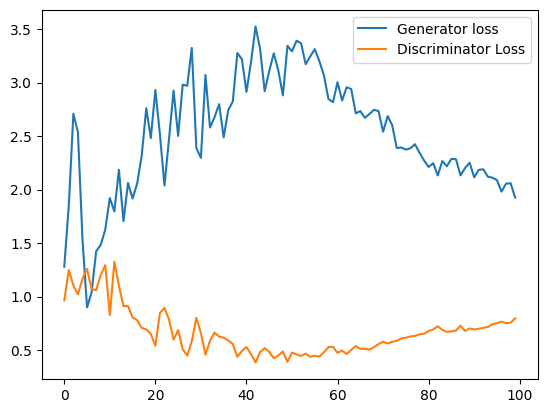

In [ ]:
losses_d_cpu = [l.cpu().detach() for l in losses_d]
losses_g_cpu = [l.cpu().detach() for l in losses_g]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g_cpu, label='Generator loss')
plt.plot(losses_d_cpu, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

### 1(b)

118it [00:16,  7.06it/s]                         


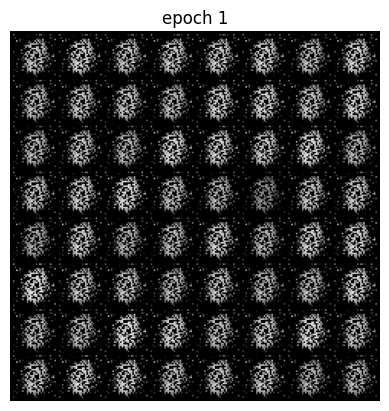

Epoch 1 of 100
Generator loss: -0.23293215, Discriminator loss: 0.42847902


118it [00:16,  7.19it/s]                         


Epoch 2 of 100
Generator loss: -0.00002181, Discriminator loss: 0.00004056


118it [00:15,  7.41it/s]                         


Epoch 3 of 100
Generator loss: -0.00002268, Discriminator loss: 0.00003630


118it [00:15,  7.63it/s]                         


Epoch 4 of 100
Generator loss: -0.00002301, Discriminator loss: 0.00003392


118it [00:15,  7.53it/s]                         


Epoch 5 of 100
Generator loss: -0.00002302, Discriminator loss: 0.00003411


118it [00:15,  7.57it/s]                         


Epoch 6 of 100
Generator loss: -0.00002579, Discriminator loss: 0.00003213


118it [00:15,  7.49it/s]                         


Epoch 7 of 100
Generator loss: -0.00002801, Discriminator loss: 0.00003674


118it [00:15,  7.50it/s]                         


Epoch 8 of 100
Generator loss: -0.00004684, Discriminator loss: 0.00005741


118it [00:16,  6.99it/s]                         


Epoch 9 of 100
Generator loss: -0.00040795, Discriminator loss: 0.00927734


118it [00:16,  7.17it/s]                         


Epoch 10 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                         


Epoch 11 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                         


Epoch 12 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                         


Epoch 13 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.09it/s]                         


Epoch 14 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.91it/s]                         


Epoch 15 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                         


Epoch 16 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.44it/s]                         


Epoch 17 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                         


Epoch 18 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                         


Epoch 19 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.37it/s]                         


Epoch 20 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                         


Epoch 21 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.37it/s]                         


Epoch 22 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                         


Epoch 23 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                         


Epoch 24 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


Epoch 25 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.41it/s]                         


Epoch 26 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.36it/s]                         


Epoch 27 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                         


Epoch 28 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                         


Epoch 29 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.41it/s]                         


Epoch 30 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.56it/s]                         


Epoch 31 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.53it/s]                         


Epoch 32 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.51it/s]                         


Epoch 33 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.28it/s]                         


Epoch 34 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.19it/s]                         


Epoch 35 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


Epoch 36 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.41it/s]                         


Epoch 37 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.51it/s]                         


Epoch 38 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.56it/s]                         


Epoch 39 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.59it/s]                         


Epoch 40 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.35it/s]                         


Epoch 41 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                         


Epoch 42 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.61it/s]                         


Epoch 43 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.67it/s]                         


Epoch 44 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.38it/s]                         


Epoch 45 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.65it/s]                         


Epoch 46 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.68it/s]                         


Epoch 47 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.52it/s]                         


Epoch 48 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                         


Epoch 49 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                         


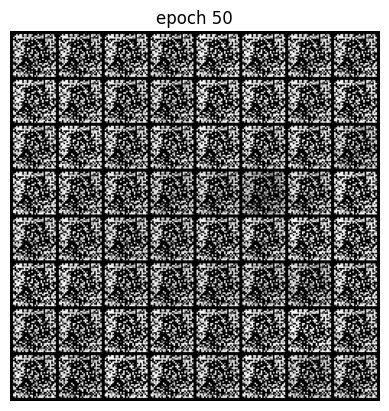

Epoch 50 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                         


Epoch 51 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.39it/s]                         


Epoch 52 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                         


Epoch 53 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.59it/s]                         


Epoch 54 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.72it/s]                         


Epoch 55 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.39it/s]                         


Epoch 56 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.43it/s]                         


Epoch 57 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.54it/s]                         


Epoch 58 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.56it/s]                         


Epoch 59 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.59it/s]                         


Epoch 60 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.71it/s]                         


Epoch 61 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.79it/s]                         


Epoch 62 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.71it/s]                         


Epoch 63 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.65it/s]                         


Epoch 64 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.54it/s]                         


Epoch 65 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.43it/s]                         


Epoch 66 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.72it/s]                         


Epoch 67 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.75it/s]                         


Epoch 68 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.77it/s]                         


Epoch 69 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.73it/s]                         


Epoch 70 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.71it/s]                         


Epoch 71 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.53it/s]                         


Epoch 72 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.34it/s]                         


Epoch 73 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.14it/s]                         


Epoch 74 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.32it/s]                         


Epoch 75 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                         


Epoch 76 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.44it/s]                         


Epoch 77 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.47it/s]                         


Epoch 78 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.47it/s]                         


Epoch 79 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.28it/s]                         


Epoch 80 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.14it/s]                         


Epoch 81 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


Epoch 82 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.51it/s]                         


Epoch 83 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                         


Epoch 84 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                         


Epoch 85 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                         


Epoch 86 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.31it/s]                         


Epoch 87 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.13it/s]                         


Epoch 88 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.53it/s]                         


Epoch 89 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


Epoch 90 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                         


Epoch 91 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.40it/s]                         


Epoch 92 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.56it/s]                         


Epoch 93 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.28it/s]                         


Epoch 94 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.05it/s]                         


Epoch 95 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                         


Epoch 96 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.51it/s]                         


Epoch 97 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.56it/s]                         


Epoch 98 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.45it/s]                         


Epoch 99 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


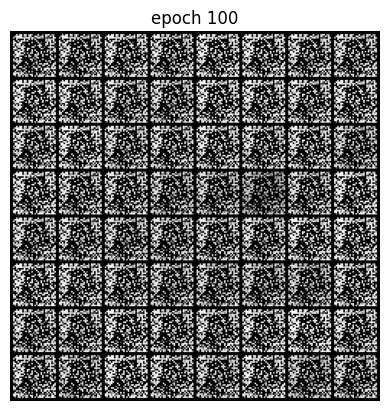

Epoch 100 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000
DONE TRAINING


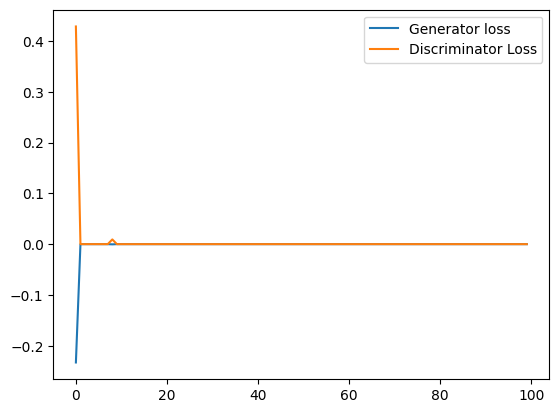

In [26]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch

torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        b_size = data[0].size(0) # batch size

        # Train discriminator
        discriminator.zero_grad()
        real_labels = label_real(b_size)
        fake_labels = label_fake(b_size)

        # Discriminator on real data
        real_outputs = discriminator(data[0].to(device))
        loss_real = discriminator_loss(real_outputs, real_labels)
        loss_real.backward()

        # Discriminator on fake data
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(fake_outputs, fake_labels)
        loss_fake.backward()

        optim_d.step()

        # Train generator
        generator.zero_grad()
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images)
        loss_generator = -generator_loss(fake_outputs, fake_labels)
        loss_generator.backward()
        optim_g.step()

        # Add loss
        loss_d += loss_real + loss_fake
        loss_g += loss_generator
        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch == 0) or (epoch == 49) or (epoch == 99):
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

losses_d_cpu = [l.cpu().detach() for l in losses_d]
losses_g_cpu = [l.cpu().detach() for l in losses_g]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g_cpu, label='Generator loss')
plt.plot(losses_d_cpu, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

### 1(c)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Generator and Discriminator architectures with Spectral Normalization
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.utils.spectral_norm(nn.Linear(self.nz, 256)),
            nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.Linear(256, 512)),
            nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.Linear(512, 1024)),
            nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.Linear(1024, 784)),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.utils.spectral_norm(nn.Linear(self.n_input, 1024)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(1024, 512)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(512, 256)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(256, 1)),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

# Wasserstein GAN with Gradient Penalty (WGAN-GP) loss
def wgan_gp_loss(real, fake, discriminator, penalty_weight=10):
    epsilon = torch.rand(real.size(0), 1, device=real.device, requires_grad=True)
    interpolates = epsilon * real + (1 - epsilon) * fake
    d_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(d_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradient_penalty = penalty_weight * ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return -torch.mean(real) + torch.mean(fake) + gradient_penalty

# Set random seed for reproducibility
torch.manual_seed(7777)

# Initialize models
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

# Set up loss and optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch

for epoch in range(epochs):
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        b_size = data[0].size(0) # batch size

        # Train discriminator
        discriminator.zero_grad()
        real_labels = label_real(b_size)
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        real_images_flat = data[0].view(-1, 784).to(device)
        fake_images_flat = fake_images.view(-1, 784)

        loss_d = wgan_gp_loss(real_images_flat, fake_images_flat, discriminator)
        loss_d.backward()
        optim_d.step()

        # Train generator
        generator.zero_grad()
        z = torch.randn(b_size, nz).to(device)
        fake_images = generator(z)
        loss_g = generator_loss(fake_outputs, real_labels)
        loss_g.backward()
        optim_g.step()

        # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch == 0) or (epoch == 49) or (epoch == 99):
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

losses_d_cpu = [l.cpu().detach() for l in losses_d]
losses_g_cpu = [l.cpu().detach() for l in losses_g]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g_cpu, label='Generator loss')
plt.plot(losses_d_cpu, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')